## Data analyste - Drug consumption

# Modelisation


In [197]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import math

In [157]:
path = "drug_consumption.data"
drugs = pd.read_csv(path, header=None, encoding="latin1")

In [158]:
drugs.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [159]:
drugs.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [160]:
nouvelles_columns = ['Ref', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Caff', 'Choc', 'Coke', 'Crack', 'Ecstasy',  'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

In [161]:
list(zip(nouvelles_columns, drugs.columns))

[('Ref', 0),
 ('Age', 1),
 ('Gender', 2),
 ('Education', 3),
 ('Country', 4),
 ('Ethnicity', 5),
 ('Nscore', 6),
 ('Escore', 7),
 ('Oscore', 8),
 ('Ascore', 9),
 ('Cscore', 10),
 ('Impulsive', 11),
 ('SS', 12),
 ('Alcohol', 13),
 ('Amphet', 14),
 ('Amyl', 15),
 ('Benzos', 16),
 ('Caff', 17),
 ('Caff', 18),
 ('Choc', 19),
 ('Coke', 20),
 ('Crack', 21),
 ('Ecstasy', 22),
 ('Heroin', 23),
 ('Ketamine', 24),
 ('Legalh', 25),
 ('LSD', 26),
 ('Meth', 27),
 ('Mushrooms', 28),
 ('Nicotine', 29),
 ('Semer', 30),
 ('VSA', 31)]

In [162]:
drugs.columns = nouvelles_columns

In [163]:
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [164]:
drugs.Age[3]

-0.9519700000000001

In [165]:
AgeRanges = {
    -0.9519700000000001 : "18-24",
    -0.07854 : "25-34",
    0.49788000000000004 : "35-44",
    1.09449 : "45-54",
    1.82213 : "55-64", 
    2.59171 : "65+"
}
AgeRanges

{-0.9519700000000001: '18-24',
 -0.07854: '25-34',
 0.49788000000000004: '35-44',
 1.09449: '45-54',
 1.82213: '55-64',
 2.59171: '65+'}

In [166]:
drugs["Age"]=drugs.Age.map(AgeRanges)
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [167]:
GenderValues = {
    0.48246000000000006 : "Female",
    -0.48246000000000006: "Male"
}
GenderValues

{0.48246000000000006: 'Female', -0.48246000000000006: 'Male'}

In [168]:
drugs["Gender"] = drugs.Gender.map(GenderValues)

In [169]:
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [170]:
tab = drugs.pivot_table(index=["Gender"], 
                         columns=["Age"],
                         values=["Ref"],
                         aggfunc="count",
                         fill_value=0)

In [171]:
tab.head()

Ref                            
Age    18-24 25-34 35-44 45-54 55-64 65+
Gender                                  
Female   237   294   202   158    43   8
Male     406   187   154   136    50  10

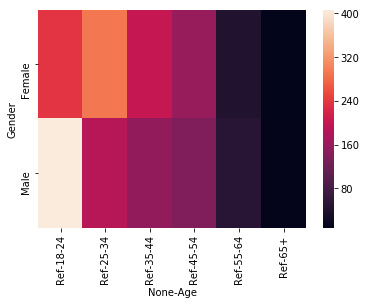

In [172]:
sns.heatmap(tab)

In [190]:
EducationMeaning = {
    -2.43591: "Left school at 16",
    -1.73790: "Left school at 17",
    -1.43719: "Left school at 18",
    -1.22751: "Left school at 18 years",
    -0.6111300000000001 : "Some college or university, no certificate or degree",
    -0.059210000000000006: "Professional certificate/diploma",
    0.45468000000000003 : "University degree", 
    1.16365 : "Masters degree",
    1.98437 : "Doctorate degree"
}
EducationMeaning

{-2.43591: 'Left school at 16',
 -1.7379: 'Left school at 17',
 -1.43719: 'Left school at 18',
 -1.22751: 'Left school at 18 years',
 -0.6111300000000001: 'Some college or university, no certificate or degree',
 -0.059210000000000006: 'Professional certificate/diploma',
 0.45468000000000003: 'University degree',
 1.16365: 'Masters degree',
 1.98437: 'Doctorate degree'}

In [191]:
drugs["EducationTest"] = drugs.Education.map(EducationMeaning)

In [187]:
*

SyntaxError: invalid syntax (<ipython-input-187-b462aee1c6c4>, line 1)